In [1]:
from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime

#basic externals
import pandas as pd
import numpy as np
import os
import matplotlib as plt 

%matplotlib inline
%reload_ext autoreload
%autoreload 2


InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 20
pd.options.display.max_columns = 50 
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
    )  # display numbers as decimals instead of scientific value

plt.rcParams["font.size"] = (18)

In [2]:
import torch
torch.cuda.get_device_name(0)


'GeForce GTX 970'

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

bs = 16

In [4]:
path_img = os.path.normpath('fastai')
#not working

In [5]:
fnames = get_image_files(path_img)
fnames[:5]

[]

In [6]:
data = ImageDataBunch.from_folder(path_img, ds_tfms=get_transforms(),valid_pct=0.2, size=224, bs=bs).normalize(imagenet_stats)


In [7]:
print(data.classes)
len(data.classes),data.c

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

(120, 120)

C:\Users\Maly-Fenix\Anaconda3\envs\fastai\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


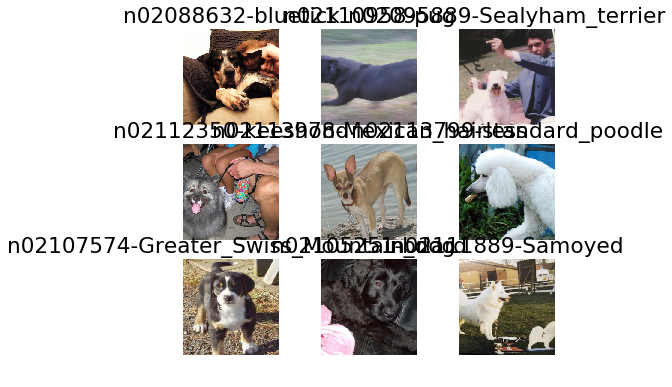

In [63]:
data.show_batch(rows=3, figsize=(7,6))

### Training: resnet34


In [8]:
## This is a workaround as learn_cnn gets stuck
def get_model(pretrained=True, model_name='resnet34' , **kwargs ):
    if model_name == 'resnet18':
        arch = models.resnet18(pretrained, **kwargs )
    if model_name == 'resnet34':
        arch = models.resnet34(pretrained, **kwargs )
    if model_name == 'resnet50':
        arch = models.resnet50(pretrained, **kwargs )
    return arch
learn = Learner(data, get_model('resnet34'), metrics=[accuracy])

In [9]:
learn.model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [12]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.501017,1.514321,0.563411,03:56
1,1.866975,1.919389,0.469388,03:55
2,1.764656,2.154808,0.422741,03:54
3,1.567680,1.738431,0.512634,03:52
4,1.305319,1.453740,0.588435,03:53
5,1.048733,1.208987,0.646016,03:56
6,0.757972,1.059897,0.688290,03:56
7,0.701044,1.031548,0.692906,03:58


In [13]:
learn.save('stage-1')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

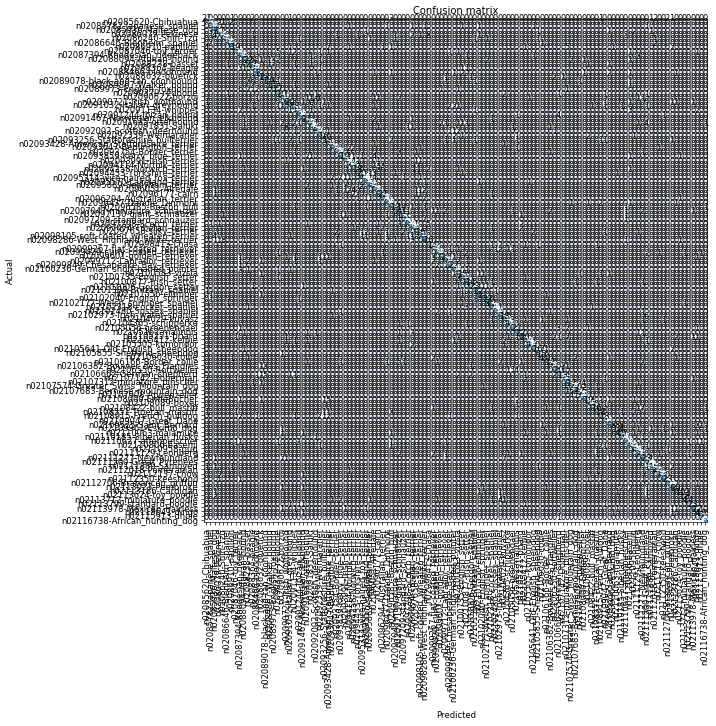

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [17]:

interp.most_confused(min_val=2)

[('n02113624-toy_poodle', 'n02113712-miniature_poodle', 12),
 ('n02094433-Yorkshire_terrier', 'n02097658-silky_terrier', 11),
 ('n02090721-Irish_wolfhound', 'n02092002-Scottish_deerhound', 10),
 ('n02089867-Walker_hound', 'n02089973-English_foxhound', 9),
 ('n02097047-miniature_schnauzer', 'n02097209-standard_schnauzer', 9),
 ('n02086240-Shih-Tzu', 'n02098413-Lhasa', 8),
 ('n02092002-Scottish_deerhound', 'n02090721-Irish_wolfhound', 8),
 ('n02098413-Lhasa', 'n02086240-Shih-Tzu', 8),
 ('n02109961-Eskimo_dog', 'n02110063-malamute', 8),
 ('n02109961-Eskimo_dog', 'n02110185-Siberian_husky', 8),
 ('n02088364-beagle', 'n02089973-English_foxhound', 7),
 ('n02091134-whippet', 'n02091032-Italian_greyhound', 7),
 ('n02105412-kelpie', 'n02107312-miniature_pinscher', 7),
 ('n02105855-Shetland_sheepdog', 'n02106030-collie', 7),
 ('n02108551-Tibetan_mastiff', 'n02111277-Newfoundland', 7),
 ('n02111500-Great_Pyrenees', 'n02104029-kuvasz', 7),
 ('n02111889-Samoyed', 'n02111500-Great_Pyrenees', 7),
 ('

In [22]:
learn.unfreeze()


In [23]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,accuracy,time
0,0.867241,1.101544,0.673469,03:55


In [24]:
learn.load('stage-1');
learn.lr_find()


Learner(data=ImageDataBunch;

Train: LabelList (16464 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n02085620-Chihuahua,n02085620-Chihuahua,n02085620-Chihuahua,n02085620-Chihuahua,n02085620-Chihuahua
Path: fastai;

Valid: LabelList (4116 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n02112018-Pomeranian,n02106550-Rottweiler,n02106550-Rottweiler,n02093991-Irish_terrier,n02097130-giant_schnauzer
Path: fastai;

Test: None, model=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


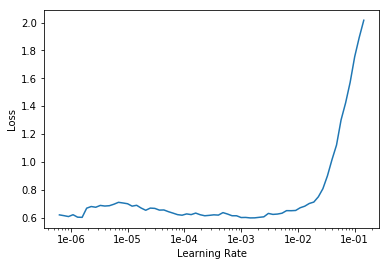

In [25]:
learn.recorder.plot()

In [54]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.702049,0.613349,0.755396,00:37


 0.75 acc not as good as Xception Keras!